# Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing datasets

In [2]:
# Creating string of project folder path
path = r'C:\Users\augus\Documents\01-2026 Instacart Basket Analysis' 

In [3]:
# importing the final merged  data set
df_final = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'orders_products_customers.pkl'))

In [4]:
df_final.shape

(32404859, 30)

In [5]:
df_final.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spend_flag,order_frequency,frequency_flag,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# Step 2: Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
# List columns to review for PII
df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spend_flag', 'order_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'no_of_dependents',
       'marital_status', 'income'],
      dtype='object')

#### Firstname and surname columns were already dropped for the previous exercise. I could not find any other personally identifiable informations in these columns.

# Step 3: Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [4]:
#creating regions with lists of states  in that region 
northeast = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", 
             "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"]
midwest = ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", 
           "Iowa", "Kansas", "Minnesota", "Missouri", 
           "Nebraska", "North Dakota", "South Dakota"]
south = ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", 
         "Virginia", "District of Columbia", "West Virginia", "Alabama", "Kentucky", 
         "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"]
west = ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", 
        "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"]

In [5]:
# Defining function to assign a state in the dataframe to region
def region(state):
    if state in northeast:
        return "Northeast"
    elif state in midwest:
        return "Midwest"
    elif state in south:
        return "South"
    elif state in west:
        return "West"
    else:
        return "Unknown"

In [6]:
#creating new column for region 
df_final["region"] = df_final["state"].apply(region)

In [8]:
#checking region cloumn
df_final["region"].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [11]:
df_final.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,frequency_flag,gender,state,age,date_joined,no_of_dependents,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


# Determine whether there’s a difference in spending habits between the different U.S. regions

In [10]:
#checking the spending habits differences between U.S regions
crosstab_regional_spending = pd.crosstab(df_final["region"], df_final["spend_flag"],dropna=False)

In [11]:
crosstab_regional_spending

spend_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31223,8261690


#### Across all regions, low spenders dominate by a large margin, but the South has the highest number of high spenders (40,579), followed by the West (31,223) and Midwest (29,265), while the Northeast has the fewest high spenders (18,642)

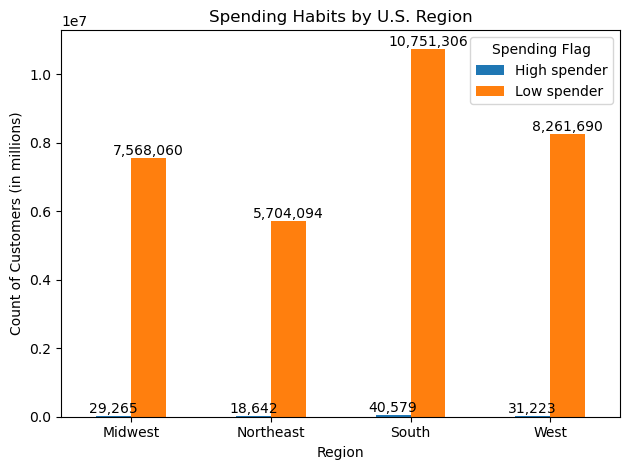

In [101]:
# Creating a bar chart to visualize crosstab. 

bar_reg_spending = crosstab_regional_spending.plot(kind="bar")
plt.title ('Spending Habits by U.S. Region')
plt.xlabel ('Region')
plt.xticks(rotation=0)
plt.ylabel ('Count of Customers (in millions)')
plt.legend(title="Spending Flag")
#bar_reg_spending.bar_label(bar_reg_spending.containers[0])+
#bar_reg_spending.bar_label(bar_reg_spending.containers[1])
for container in bar_reg_spending.containers:
    bar_reg_spending.bar_label(container,fmt='{:,.0f}', label_type="edge")
plt.tight_layout()

In [102]:
# Exporting bar chart
bar_reg_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_reg_spending.png'))

# Step 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [7]:
# Creating low_activity_flag where max_order is less than 5
df_final['low_activity_flag'] = np.where(df_final['max_order'] < 5, 1, 0)

In [8]:
df_final['low_activity_flag'].value_counts(dropna=False)

low_activity_flag
0    30964564
1     1440295
Name: count, dtype: int64

In [9]:
# Excluding low-activity customers (fewer than 5 lifetime orders)
df_final_cfo = df_final[df_final['low_activity_flag'] == 0]

In [12]:
df_final_cfo.shape

(30964564, 32)

In [18]:
# Export CFO-relevant dataset for downstream analysis and reporting
df_final_cfo.to_pickle(os.path.join(path, "02 Data", "Prepared Data", "orders_products_customers_cfo.pkl"))

In [53]:
# dataset for  low-activity customers (fewer than 5 lifetime orders)
df_final_low_activity = df_final[df_final['low_activity_flag'] == 1]

In [54]:
df_final_low_activity.shape

(1440295, 32)

In [55]:
# Export low activity customers  dataset 
df_final_low_activity.to_pickle(os.path.join(path, "02 Data", "Prepared Data", "orders_products_customers_low_activity.pkl"))

# Step 5: Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [10]:
#defining customer profiles 
def profile(row):
    # Young Adult
    if row['age'] < 34 and row['no_of_dependents'] == 0 and row['income'] < 120000 :
        return "Single Adult"

    # Young Parent
    elif 25 <= row['age'] <= 40 and row['no_of_dependents'] <= 2 and  60000<= row['income'] <= 120000 :
        return "Young Parent"

    # Budget Family Shopper
    elif 30 <= row['age'] <= 49 and  row['no_of_dependents'] >= 2 and  row['income'] < 60000 :
        return "Budget Family Shopper"

    # Family Household
    elif 28 <= row['age'] <= 55 and row['no_of_dependents'] >= 2 and 60000 <= row['income'] <= 120000:
        return "Family Household"

    # Affluent Premium Household
    elif 30 <= row['age'] <= 64 and  row['no_of_dependents'] <= 2 and  row['income'] > 120000 :
        return "Affluent Premium Household"

    # Senior Essentials Shopper
    elif row['age'] >= 65 and  row['no_of_dependents'] <= 1 and  row['income'] <= 120000 :
        return "Senior Essentials Shopper"
    else:
        return "General shopper"

In [11]:
#creating new column for customer profile
df_final_cfo["profile"] = df_final_cfo.apply(profile, axis=1)

C:\Users\augus\AppData\Local\Temp\ipykernel_14116\2175785330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cfo["profile"] = df_final_cfo.apply(profile, axis=1)


In [13]:
df_final_cfo['profile'].value_counts(dropna=False)

profile
General shopper               15974801
Affluent Premium Household     4029266
Young Parent                   3124418
Family Household               2601135
Senior Essentials Shopper      2208148
Single Adult                   1918786
Budget Family Shopper          1108010
Name: count, dtype: int64

# Step 6:Create an appropriate visualization to show the distribution of profiles.

In [14]:
# Dropping duplicate user_id's since there are multiple rows for the same user
df_6 = df_final_cfo.drop_duplicates("user_id")

In [24]:
df_6['profile'].value_counts(dropna=False)

profile
General shopper               85104
Affluent Premium Household    19839
Young Parent                  15401
Family Household              12775
Senior Essentials Shopper     12310
Single Adult                  10192
Budget Family Shopper          7010
Name: count, dtype: int64

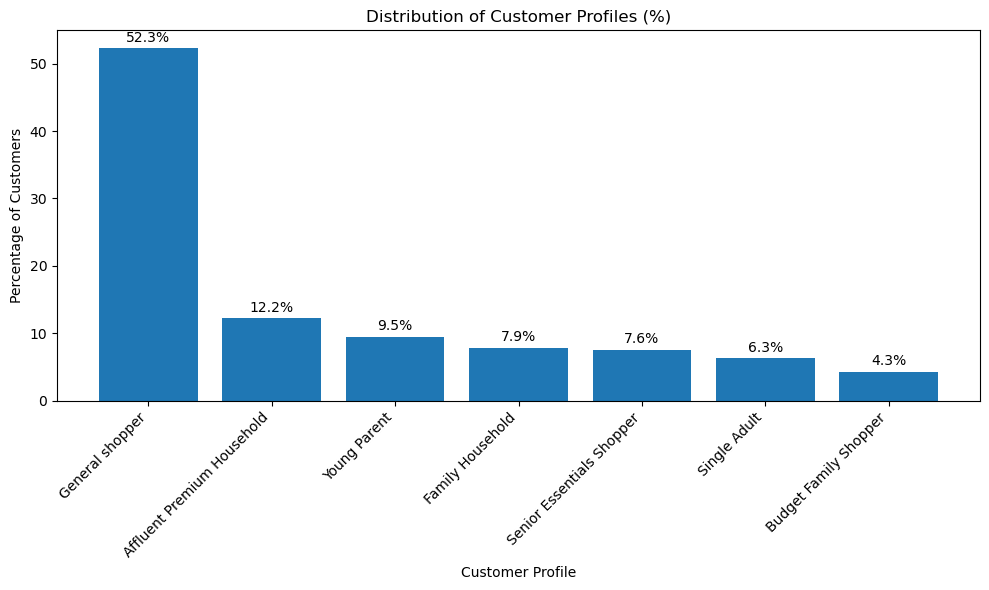

In [44]:
# Count profiles
profile_counts = df_6['profile'].value_counts()
# Convert to percentages
profile_perc = (profile_counts / profile_counts.sum()) * 100


fig=plt.figure(figsize=(10,6))
bar_customer_profile =  plt.bar(profile_perc.index, profile_perc.values)
plt.title ('Distribution of Customer Profiles (%)')
plt.xlabel ('Customer Profile')
plt.ylabel ('Percentage of Customers')

for bar in bar_customer_profile:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.5,
             f"{height:.1f}%",
             ha="center", va="bottom")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [43]:
# Export bar chart
fig.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_customer_profile.png'),
            dpi=300, bbox_inches='tight')

# Step 7:Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [40]:
#since we already have customer-level metrics  (order_frequency, average_spend, max_order),
#I am aggregating to customer_profile in one step 

profile_agg = (
    df_6.groupby("profile")
     .agg(
         # --- Usage frequency (we have order_frequency already: median days between orders)
         min_order_frequency=("order_frequency", "min"),
         mean_order_frequency=("order_frequency", "mean"),
         max_order_frequency=("order_frequency", "max"),

         # --- Expenditure (we have average_spend already: mean item price per user)
         min_avg_spend=("average_spend", "min"),
         mean_avg_spend=("average_spend", "mean"),
         max_avg_spend=("average_spend", "max"),

         # --- Usage volume / engagement (max_order = max order_number per user)
         min_max_order=("max_order", "min"),
         mean_max_order=("max_order", "mean"),
         max_max_order=("max_order", "max"),

         customers=("user_id", "nunique")  # optional but very useful
     )
     .reset_index()
)

profile_agg

,profile,min_order_frequency,mean_order_frequency,max_order_frequency,min_avg_spend,mean_avg_spend,max_avg_spend,min_max_order,mean_max_order,max_max_order,customers
0,Affluent Premium Household,0.0,13.544181,30.0,5.812821,8.041501,16.294737,5,19.227481,99,19839
1,Budget Family Shopper,0.0,14.430171,30.0,1.000000,6.964950,14.423077,5,17.791013,99,7010
2,Family Household,0.0,13.591507,30.0,6.216176,8.056131,15.706667,5,19.255421,99,12775
3,General shopper,0.0,13.814821,30.0,1.000000,7.681093,20.114286,5,18.801325,99,85104
4,Senior Essentials Shopper,0.0,13.795126,30.0,1.300000,7.546073,19.400000,5,18.461901,99,12310
5,Single Adult,0.0,13.852286,30.0,1.800000,7.733701,14.761905,5,18.618034,99,10192
6,Young Parent,0.0,13.519804,30.0,5.434483,8.051983,18.233333,5,19.173300,99,15401


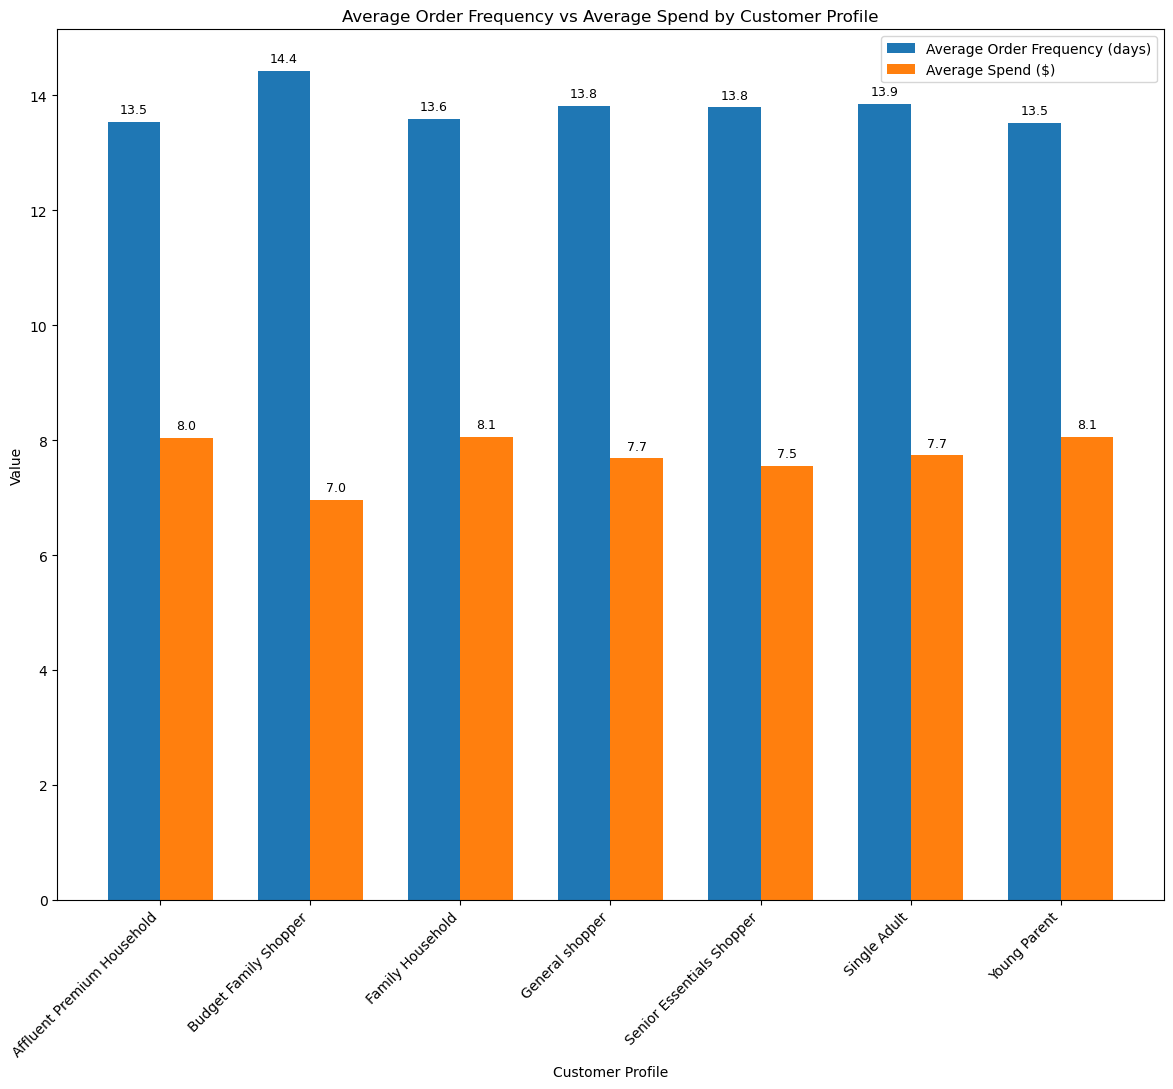

In [42]:
# generating grouped barchart
plot_df = profile_agg[['profile', 'mean_order_frequency', 'mean_avg_spend']].copy()
x = np.arange(len(plot_df['profile']))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(12,11))

# Bars
bar1 = ax.bar(x - width/2, plot_df['mean_order_frequency'], width, label='Average Order Frequency (days)')
bar2 = ax.bar(x + width/2, plot_df['mean_avg_spend'], width, label='Average Spend ($)')

# Titles and labels
ax.set_title("Average Order Frequency vs Average Spend by Customer Profile")
ax.set_xlabel("Customer Profile")
ax.set_ylabel("Value")
ax.set_xticks(x)
ax.set_xticklabels(plot_df['profile'], rotation=45, ha='right')

# Add value labels 
for bars in [bar1, bar2]:
    for b in bars:
        height = b.get_height()
        ax.text(b.get_x() + b.get_width()/2, height + 0.1, f"{height:.1f}",
                ha='center', va='bottom', fontsize=9)

ax.legend()
fig.tight_layout()
plt.show()
fig.savefig(os.path.join(path,'04 Analysis','Visualizations', "profile_agg.png"),
            dpi=300, bbox_inches="tight")

# Step 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

# 1) Profile distribution by region

In [15]:
profile_region = (
    df_6.groupby(["region", "profile"])["user_id"]
    .nunique()
    .reset_index(name="customers")
)
# % share of each profile within a region
profile_region["region_pct"] = (
    profile_region["customers"] /
    profile_region.groupby("region")["customers"].transform("sum")
) * 100

profile_region.sort_values(["region", "region_pct"], ascending=[True, False])

,region,profile,customers,region_pct
3,Midwest,General shopper,20143,52.488535
0,Midwest,Affluent Premium Household,4786,12.471336
6,Midwest,Young Parent,3605,9.393892
2,Midwest,Family Household,3020,7.869502
4,Midwest,Senior Essentials Shopper,2877,7.496873
5,Midwest,Single Adult,2300,5.993329
1,Midwest,Budget Family Shopper,1645,4.286533
10,Northeast,General shopper,14814,51.831636
7,Northeast,Affluent Premium Household,3526,12.336867
13,Northeast,Young Parent,2697,9.436339


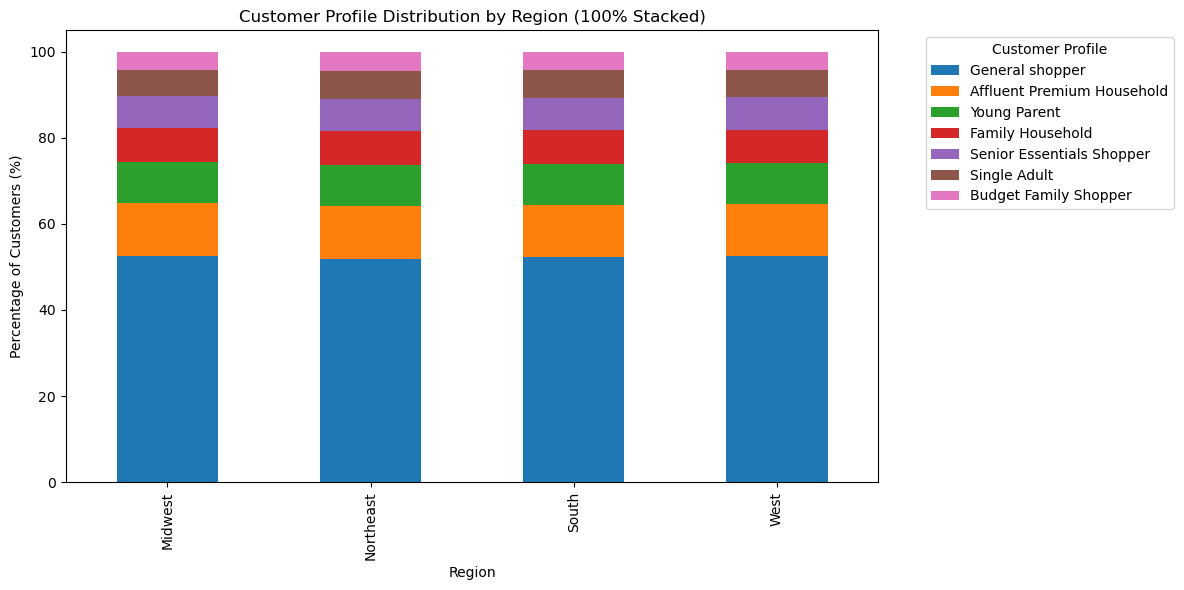

In [43]:
#generating stacked bar chart
pivot_df = profile_region.pivot(index='region', columns='profile', values='region_pct')

# sorting profiles by overall size
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]

# Plot 100% stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title("Customer Profile Distribution by Region (100% Stacked)")
plt.xlabel("Region")
plt.ylabel("Percentage of Customers (%)")
plt.legend(title="Customer Profile", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()


plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'stacked_profile_by_region.png'), dpi=300, bbox_inches='tight')
plt.show()

# 2) Profile vs department preference (what they buy most)

In [45]:
# adding a new column for department_name
dept_map = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
    21: "missing"
}
df_final_cfo["department_name"] = df_final_cfo["department_id"].map(dept_map)

C:\Users\augus\AppData\Local\Temp\ipykernel_14116\3843362632.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cfo["department_name"] = df_final_cfo["department_id"].map(dept_map)


In [53]:
pd.options.display.max_rows = None

In [30]:
profile_dept = (
    df_final_cfo.groupby(["profile", "department_name"])["order_id"]
    .count()
    .reset_index(name="items")
)
# Convert to % within each customer profile
profile_dept["profile_dept_pct"] = (
    profile_dept["items"] /
    profile_dept.groupby("profile")["items"].transform("sum")
) * 100

profile_dept.sort_values(["profile", "profile_dept_pct"], ascending=[True, False])

,profile,department_name,items,profile_dept_pct
19,Affluent Premium Household,produce,1192804,29.603506
7,Affluent Premium Household,dairy eggs,685130,17.003841
3,Affluent Premium Household,beverages,321053,7.968027
20,Affluent Premium Household,snacks,314057,7.794397
10,Affluent Premium Household,frozen,280742,6.967572
...,...,...,...,...
126,Young Parent,alcohol,12880,0.412237
144,Young Parent,pets,9567,0.306201
140,Young Parent,missing,6547,0.209543
131,Young Parent,bulk,3481,0.111413


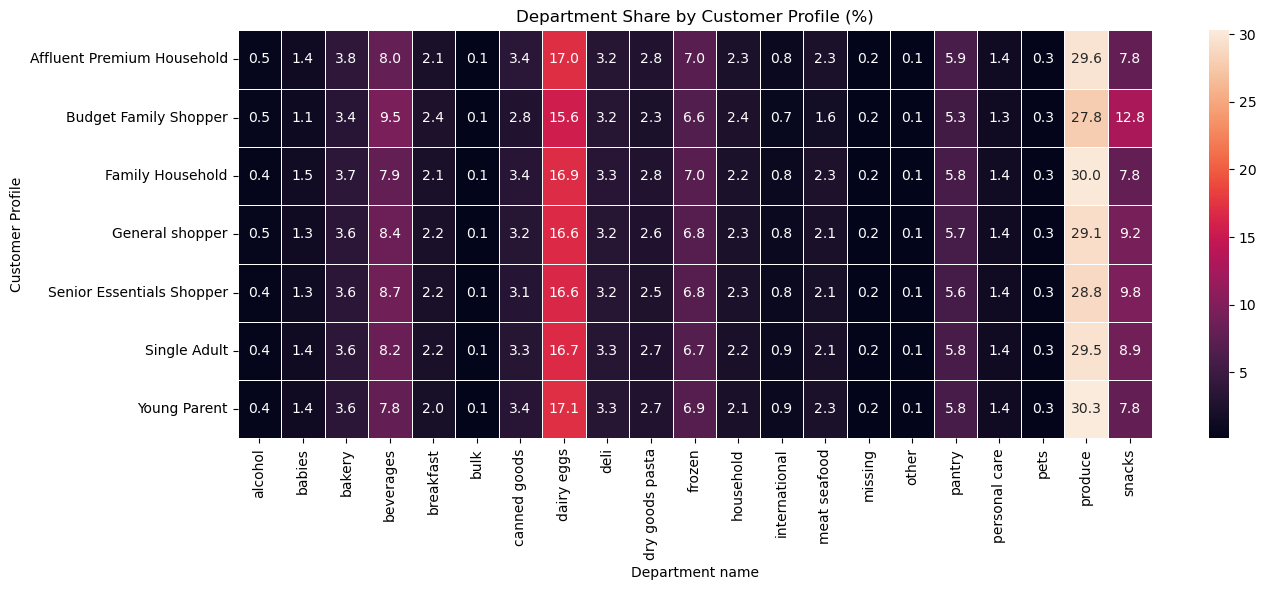

In [46]:
#generating heatmap
heatmap_df = profile_dept.pivot_table(
    index="profile",
    columns="department_name",
    values="profile_dept_pct",
    aggfunc="sum"
)

#sorting profiles 
heatmap_df = heatmap_df.sort_index()

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(
    heatmap_df,
    annot=True,           # show % values inside cells
    fmt=".1f",            # 1 decimal format
    linewidths=0.5
)

plt.title("Department Share by Customer Profile (%)")
plt.xlabel("Department name")
plt.ylabel("Customer Profile")
plt.tight_layout()


plt.savefig(os.path.join(path,'04 Analysis','Visualizations', "heatmap_profile_department.png"),
            dpi=300, bbox_inches="tight")
plt.show()

In [47]:
# creating dataframe for top 5 departments per profile
top5_depts_per_profile = (
    profile_dept.sort_values(["profile", "profile_dept_pct"], ascending=[True, False])
    .groupby("profile")
    .head(5)
)
top5_depts_per_profile

,profile,department_name,items,profile_dept_pct
19,Affluent Premium Household,produce,1192804,29.603506
7,Affluent Premium Household,dairy eggs,685130,17.003841
3,Affluent Premium Household,beverages,321053,7.968027
20,Affluent Premium Household,snacks,314057,7.794397
10,Affluent Premium Household,frozen,280742,6.967572
40,Budget Family Shopper,produce,308478,27.840723
28,Budget Family Shopper,dairy eggs,173068,15.619715
41,Budget Family Shopper,snacks,142351,12.847447
24,Budget Family Shopper,beverages,105346,9.507676
31,Budget Family Shopper,frozen,72890,6.578460


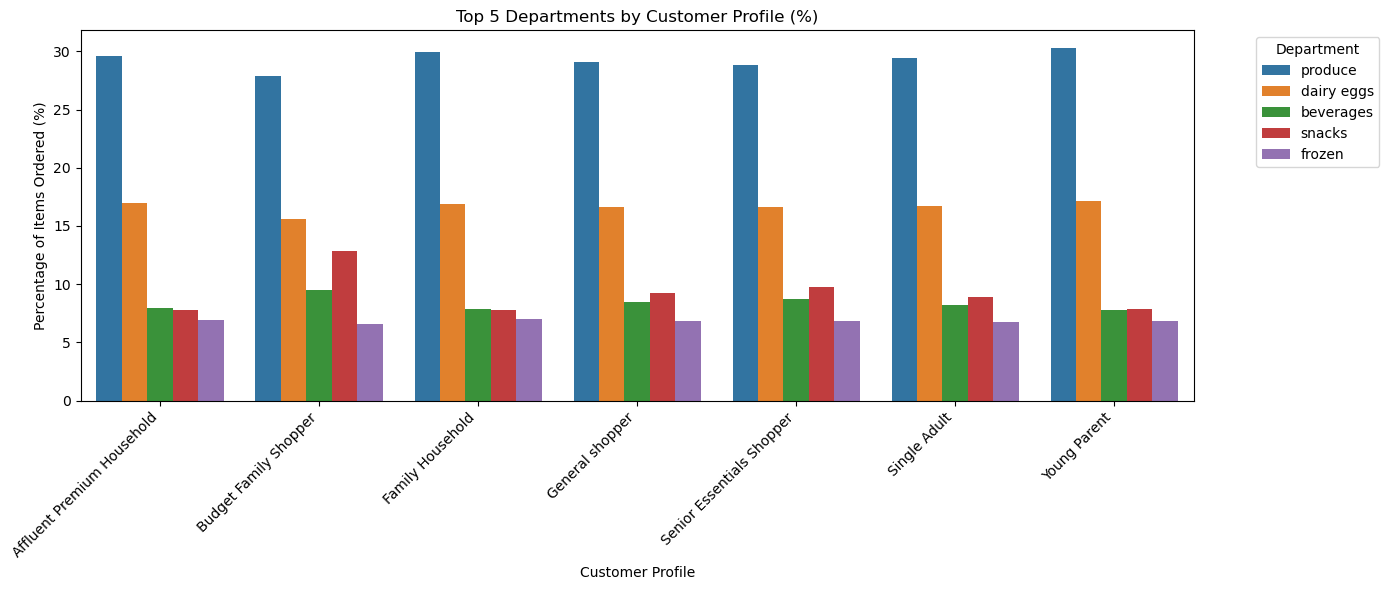

In [48]:
# generating grouped bar chart
fig=plt.figure(figsize=(14,6))
sns.barplot(
    data=top5_depts_per_profile,
    x="profile",
    y="profile_dept_pct",
    hue="department_name"
)

plt.title("Top 5 Departments by Customer Profile (%)")
plt.xlabel("Customer Profile")
plt.ylabel("Percentage of Items Ordered (%)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

fig.savefig(os.path.join(path,'04 Analysis','Visualizations', 'top5_depts_per_profile.png'),
            dpi=300, bbox_inches="tight")

# 3) Region + Department within each profile

In [49]:
# creating dataframe with profile, region and department
profile_region_dept = (
    df_final_cfo.groupby(["profile", "region", "department_name"])["order_id"]
    .count()
    .reset_index(name="items")
)

profile_region_dept["pct_within_profile_region"] = (
    profile_region_dept["items"] /
    profile_region_dept.groupby(["profile", "region"])["items"].transform("sum")
) * 100

profile_region_dept.sort_values(
    ["profile", "region", "pct_within_profile_region"],
    ascending=[True, True, False]
)

,profile,region,department_name,items,pct_within_profile_region
19,Affluent Premium Household,Midwest,produce,290999,29.538757
7,Affluent Premium Household,Midwest,dairy eggs,167775,17.030522
3,Affluent Premium Household,Midwest,beverages,79047,8.023911
20,Affluent Premium Household,Midwest,snacks,78131,7.930930
10,Affluent Premium Household,Midwest,frozen,67890,6.891385
...,...,...,...,...,...
567,Young Parent,West,alcohol,3403,0.426063
585,Young Parent,West,pets,2302,0.288215
581,Young Parent,West,missing,1643,0.205707
572,Young Parent,West,bulk,937,0.117314


In [50]:
# creating dataframe for top3 departments per profile and region
top3_depts_profile_region = (
    profile_region_dept.sort_values(
        ["profile", "region", "pct_within_profile_region"],
        ascending=[True, True, False]
    )
    .groupby(["profile", "region"])
    .head(3)
)

top3_depts_profile_region

,profile,region,department_name,items,pct_within_profile_region
19,Affluent Premium Household,Midwest,produce,290999,29.538757
7,Affluent Premium Household,Midwest,dairy eggs,167775,17.030522
3,Affluent Premium Household,Midwest,beverages,79047,8.023911
40,Affluent Premium Household,Northeast,produce,201115,28.954408
28,Affluent Premium Household,Northeast,dairy eggs,117833,16.964347
...,...,...,...,...,...
553,Young Parent,South,dairy eggs,183702,17.240564
566,Young Parent,South,snacks,83020,7.791486
586,Young Parent,West,produce,239871,30.032377
574,Young Parent,West,dairy eggs,137535,17.219685


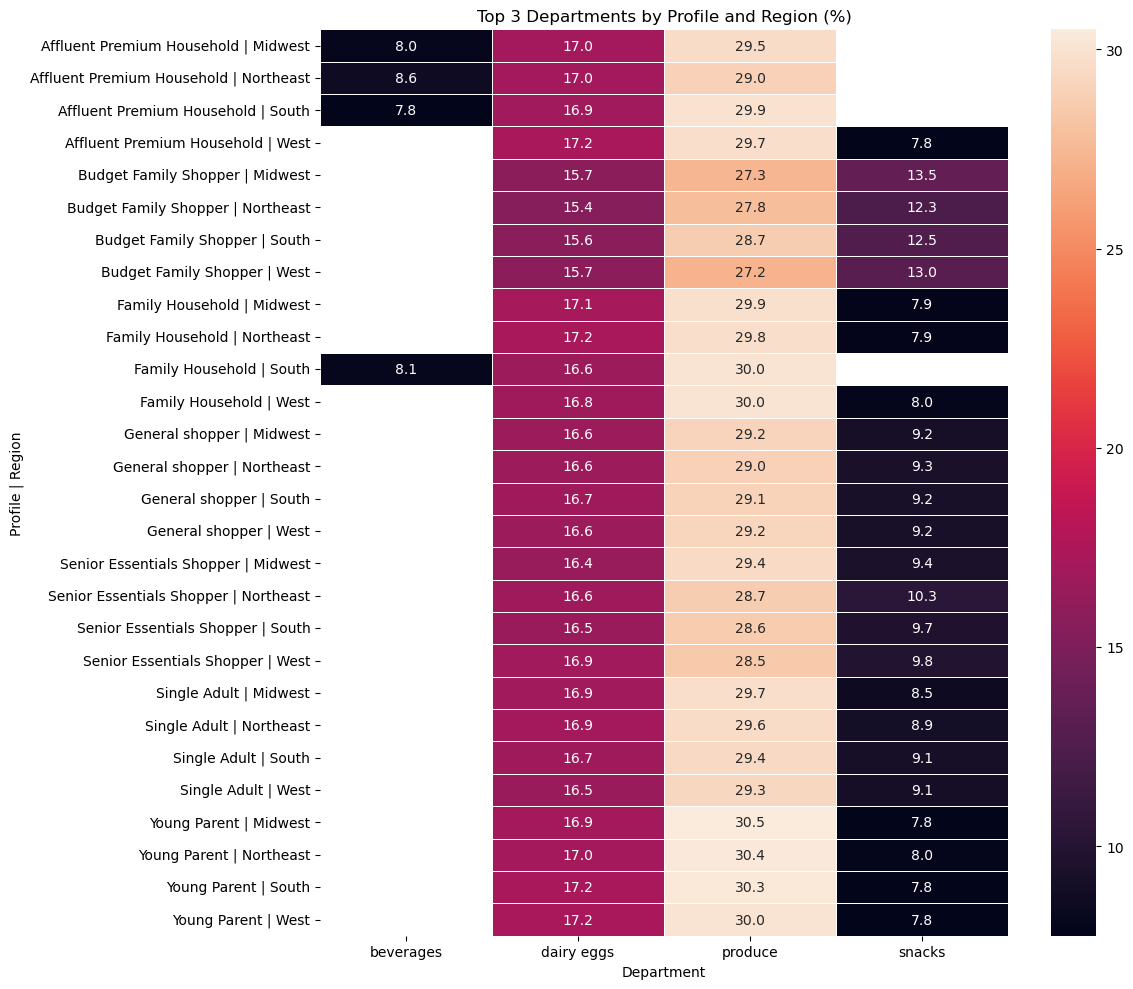

In [51]:
# generating heatmap
top3_depts_profile_region["profile_region"] = top3_depts_profile_region["profile"] + " | " + top3_depts_profile_region["region"]

# Pivot table for heatmap
heatmap_df = top3_depts_profile_region.pivot_table(
    index="profile_region",
    columns="department_name",
    values="pct_within_profile_region",
    aggfunc="sum"
)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".1f",
    linewidths=0.5
)

plt.title("Top 3 Departments by Profile and Region (%)")
plt.xlabel("Department")
plt.ylabel("Profile | Region")
plt.tight_layout()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', "heatmap_profile_departmen_regiont.png"),
            dpi=300, bbox_inches="tight")
plt.show()

In [52]:
# Export final dataset  with customer profiles 
df_final_cfo.to_pickle(os.path.join(path, "02 Data", "Prepared Data", "orders_products_all.pkl"))